<a href="https://colab.research.google.com/github/sbogde/pandamonium/blob/main/dmi_01_world_happiness_report_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# World Happiness Report 🙂

In [78]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set default styling for visualizations
sns.set(style="whitegrid")

In [79]:
# Upload the dataset
# from google.colab import files
# uploaded = files.upload()  # Manually upload the CSV file

# Load the dataset into a DataFrame (update filename as needed)
# file_name = "world_happiness.csv"  # Adjust to your uploaded file name
# df = pd.read_csv(file_name)

# Display the first few rows to confirm successful loading
# df.head()

In [80]:
# Loading The Dataset
# Check if running in Google Colab
# Dynamically set the file path based on the execution environment
if 'google.colab' in str(get_ipython()):
    from google.colab import drive, data_table
    drive.mount('/content/drive', force_remount=True)
    file_path = '/content/drive/My Drive/Colab Notebooks/data-mining/data/world_happiness_report_2024.csv'
    data_table.enable_dataframe_formatter()
else:
    file_path = './data/world_happiness_report_2024.csv'  # Local path

Mounted at /content/drive


In [81]:
df = pd.read_csv(file_path)

# Display the first few rows to confirm successful loading
df.head()

,Country name,Ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual
0,Finland,7.741,7.815,7.667,1.844,1.572,0.695,0.859,0.142,0.546,2.082
1,Denmark,7.583,7.665,7.500,1.908,1.520,0.699,0.823,0.204,0.548,1.881
2,Iceland,7.525,7.618,7.433,1.881,1.617,0.718,0.819,0.258,0.182,2.050
3,Sweden,7.344,7.422,7.267,1.878,1.501,0.724,0.838,0.221,0.524,1.658
4,Israel,7.341,7.405,7.277,1.803,1.513,0.740,0.641,0.153,0.193,2.298


In [82]:
df.columns = df.columns.str.strip()

In [83]:
# Initial inspection of DataFrame structure
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143 entries, 0 to 142
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Country name                  143 non-null    object 
 1   Ladder score                  143 non-null    float64
 2   upperwhisker                  143 non-null    float64
 3   lowerwhisker                  143 non-null    float64
 4   Logged GDP per capita         140 non-null    float64
 5   Social support                140 non-null    float64
 6   Healthy life expectancy       140 non-null    float64
 7   Freedom to make life choices  140 non-null    float64
 8   Generosity                    140 non-null    float64
 9   Perceptions of corruption     140 non-null    float64
 10  Dystopia + residual           140 non-null    float64
dtypes: float64(10), object(1)
memory usage: 12.4+ KB


In [84]:
# Check for missing values
print("\nMissing values across columns:")
print(df.isnull().sum())


Missing values across columns:
Country name                    0
Ladder score                    0
upperwhisker                    0
lowerwhisker                    0
Logged GDP per capita           3
Social support                  3
Healthy life expectancy         3
Freedom to make life choices    3
Generosity                      3
Perceptions of corruption       3
Dystopia + residual             3
dtype: int64


In [85]:
# Drop irrelevant columns and handle missing values
columns_to_drop = ['Dystopia + residual']
df = df.drop(columns=columns_to_drop, errors='ignore')

# Drop rows with missing values
df = df.dropna()

# Verify the cleaned DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 140 entries, 0 to 142
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Country name                  140 non-null    object 
 1   Ladder score                  140 non-null    float64
 2   upperwhisker                  140 non-null    float64
 3   lowerwhisker                  140 non-null    float64
 4   Logged GDP per capita         140 non-null    float64
 5   Social support                140 non-null    float64
 6   Healthy life expectancy       140 non-null    float64
 7   Freedom to make life choices  140 non-null    float64
 8   Generosity                    140 non-null    float64
 9   Perceptions of corruption     140 non-null    float64
dtypes: float64(9), object(1)
memory usage: 12.0+ KB


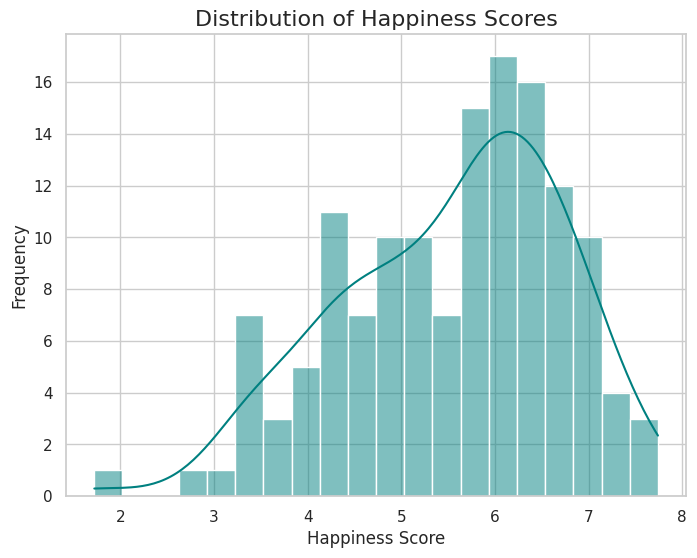

In [86]:
# Happiness score distribution
plt.figure(figsize=(8, 6))
sns.histplot(df['Ladder score'], kde=True, bins=20, color='teal')
plt.title('Distribution of Happiness Scores', fontsize=16)
plt.xlabel('Happiness Score', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

In [87]:
# Calculate the correlation
correlation = df['Ladder score'].corr(df['Logged GDP per capita'])
print(f"The correlation between Happiness Score and GDP per Capita is: {correlation:.2f}")

The correlation between Happiness Score and GDP per Capita is: 0.77


In [88]:
!pip install pycountry_convert

In [89]:
rename_dict = {
    'Kosovo': 'Republic of Kosovo',
    'Taiwan Province of China': 'Taiwan',
    'Hong Kong S.A.R. of China': 'Hong Kong',
    'Congo (Brazzaville)': 'Republic of the Congo',
    'Congo (Kinshasa)': 'Democratic Republic of the Congo',
    'Turkiye': 'Turkey'
}

df['Country name'] = df['Country name'].replace(rename_dict)

In [90]:
import pycountry_convert as pc

def country_to_continent(country_name):
    # Manual mapping for special cases:
    if country_name in ['Kosovo', 'Republic of Kosovo']:
        return 'Europe'

    try:
        country_alpha2 = pc.country_name_to_country_alpha2(country_name)
        continent_code = pc.country_alpha2_to_continent_code(country_alpha2)
        continent_name = pc.convert_continent_code_to_continent_name(continent_code)
        return continent_name
    except Exception as e:
        return 'Unknown'

df['Region'] = df['Country name'].apply(country_to_continent)

In [91]:
df.columns

Index(['Country name', 'Ladder score', 'upperwhisker', 'lowerwhisker',
       'Logged GDP per capita', 'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Region'],
      dtype='object')

In [92]:
# df.head(21)

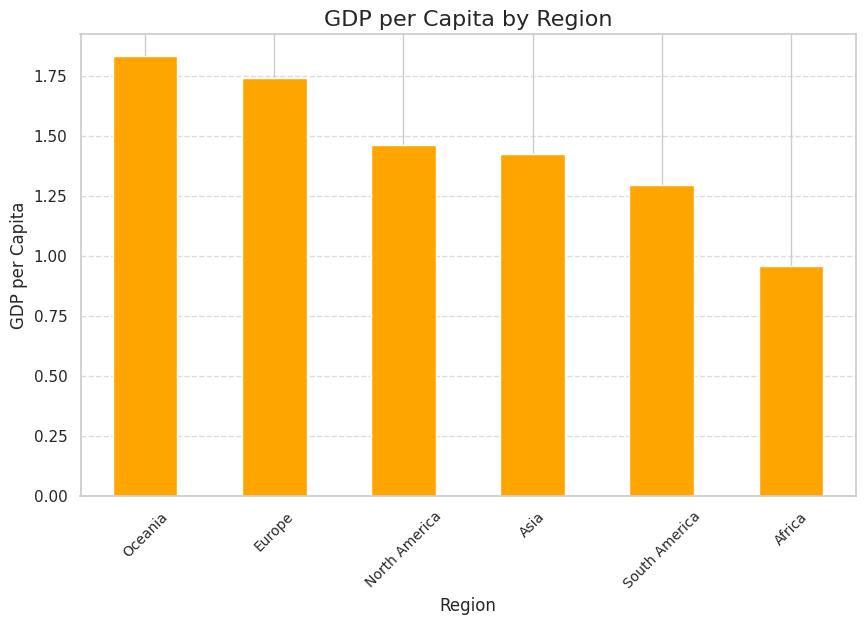

In [93]:
# Mean GDP per region shown in a bar chart
gdp_trends = df.groupby('Region')['Logged GDP per capita'].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
gdp_trends.plot(kind='bar', color='orange')
plt.title('GDP per Capita by Region', fontsize=16)
plt.xlabel('Region', fontsize=12)
plt.ylabel('GDP per Capita', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

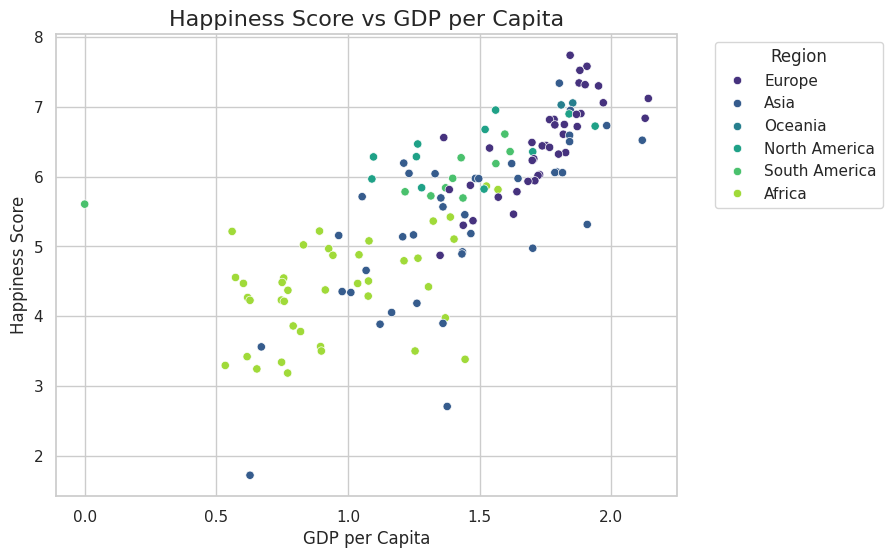

In [94]:
# Scatter plot to check correlation between GDP and Happiness Score
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Logged GDP per capita', y='Ladder score', hue='Region', data=df, palette='viridis')
plt.title('Happiness Score vs GDP per Capita', fontsize=16)
plt.xlabel('GDP per Capita', fontsize=12)
plt.ylabel('Happiness Score', fontsize=12)
plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

<ipython-input-95-d7563c9edfb5>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = "Ladder score", y = "Country name", data=df_happiest_unhappiest, palette = "coolwarm")


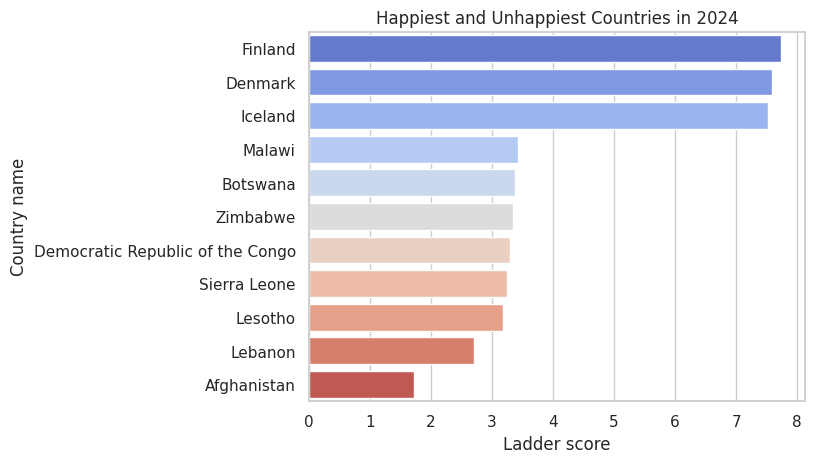

In [95]:
df_happiest_unhappiest = df[(df.loc[:, "Ladder score"] > 7.4) | (df.loc[:, "Ladder score"] < 3.5)]
sns.barplot(x = "Ladder score", y = "Country name", data=df_happiest_unhappiest, palette = "coolwarm")
plt.title("Happiest and Unhappiest Countries in 2024")
plt.show()

In [96]:
# df_g = df[(df.loc[:, "Generosity"] > 0.3) | (df.loc[:, "Generosity"] < -0.2)]
# sns.barplot(x = "Generosity", y = "Country name", data = df_g, palette = "coolwarm")
# plt.title("Most Generous and Most Ungenerous Countries in 2024")
# plt.show()

In [97]:
# Filter the DataFrame to show rows where 'Region' is "Unknown"
unknown_countries = df[df['Region'] == 'Unknown']['Country name'].unique()

print("Countries classified as 'Unknown':", unknown_countries)

Countries classified as 'Unknown': []


In [98]:
regions = df['Region'].unique()

for region in regions:
    countries_in_region = df[df['Region'] == region]['Country name'].unique()
    print(f"Countries in {region}: {', '.join(countries_in_region)}")

Countries in Europe: Finland, Denmark, Iceland, Sweden, Netherlands, Norway, Luxembourg, Switzerland, Austria, Belgium, Ireland, Czechia, Lithuania, United Kingdom, Slovenia, Germany, France, Republic of Kosovo, Romania, Estonia, Poland, Spain, Serbia, Malta, Italy, Slovakia, Latvia, Portugal, Hungary, Croatia, Greece, Bosnia and Herzegovina, Moldova, Russia, Montenegro, Bulgaria, North Macedonia, Albania, Ukraine
Countries in Asia: Israel, Kuwait, United Arab Emirates, Saudi Arabia, Singapore, Taiwan, Uzbekistan, Kazakhstan, Cyprus, Japan, South Korea, Philippines, Vietnam, Thailand, Malaysia, China, Kyrgyzstan, Mongolia, Indonesia, Armenia, Hong Kong, Georgia, Iraq, Nepal, Laos, Turkey, Iran, Azerbaijan, Pakistan, Myanmar, Cambodia, Jordan, India, Sri Lanka, Bangladesh, Yemen, Lebanon, Afghanistan
Countries in Oceania: Australia, New Zealand
Countries in North America: Costa Rica, Canada, United States, Mexico, El Salvador, Panama, Guatemala, Nicaragua, Honduras, Jamaica, Dominican R

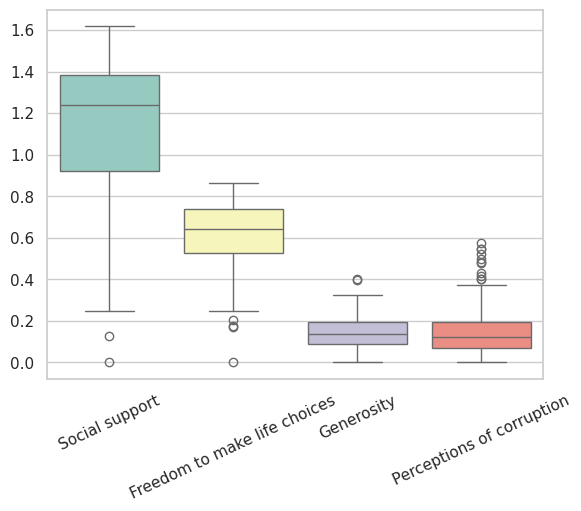

In [99]:
list_features = ["Social support", "Freedom to make life choices", "Generosity", "Perceptions of corruption"]
sns.boxplot(data = df.loc[:, list_features], orient = "v", palette = "Set3")

plt.xticks(rotation=25)  # Rotate x-axis labels by 45 degrees
plt.show()

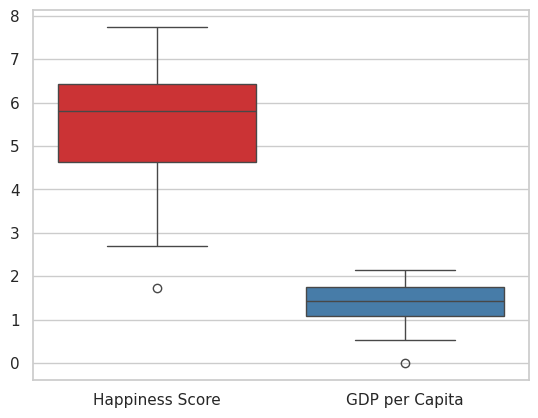

In [109]:
list_features = ["Ladder score", "Logged GDP per capita"]
sns.boxplot(data = df.loc[:, list_features], orient = "v", palette = "Set1")

rename_map = {
    'Ladder score': 'Happiness Score',
    'Logged GDP per capita': 'GDP per Capita',
}
short_labels = [rename_map.get(col, col) for col in list_features]
plt.xticks(ticks=range(len(list_features)), labels=short_labels)

plt.show()